TESTE DE TÉCNICAS DE NLP E APLICABICABILIDADE NO PROJETO TERA

# Estrutura
- Tokenização
- BOW
- N-GRAM
- Limpeza 
    - STOPWORDS
    - Stemming
    - Lemmatization
- TF-IDF
- Part of speech (POS)
- Named entity recognition (NER)
- Word embedding 

In [1]:
import pandas as pd
import numpy as np
import spacy
import nltk
import pt_core_news_sm
from nltk.stem import RSLPStemmer
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('rslp')

c:\Users\55199\AppData\Local\Programs\Python\Python310\lib\site-packages\requests\__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (5.0.0)/charset_normalizer (2.0.12) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\55199\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\55199\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package rslp to
[nltk_data]     C:\Users\55199\AppData\Roaming\nltk_data...
[nltk_data]   Package rslp is already up-to-date!


True

In [2]:
df = pd.read_csv('data/erika_hilton.csv', on_bad_lines='skip', sep=';', encoding='utf-8')

C:\Users\55199\AppData\Local\Temp\ipykernel_10276\1077869811.py:1: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data/erika_hilton.csv', on_bad_lines='skip', sep=';', encoding='utf-8')


In [3]:
df[df['user'] == "https://twitter.com/ErikakHilton"]

,url,date,rawContent,renderedContent,id,user,replyCount,retweetCount,likeCount,quoteCount,...,user_statusesCount,user_favouritesCount,user_listedCount,user_mediaCount,user_location,user_protected,user_link,user_profileImageUrl,user_profileBannerUrl,user_label
0,https://twitter.com/ErikakHilton/status/158721...,2022-10-31 22:58:38+00:00,"Ao longo do dia estou recebendo denúncias, inc...","Ao longo do dia estou recebendo denúncias, inc...",1587217512470659074,https://twitter.com/ErikakHilton,61,327,2568,63,...,26139,64635,459,3181,"São Paulo, Brasil",False,"TextLink(text='erikahilton.com.br', url='http:...",https://pbs.twimg.com/profile_images/155938099...,https://pbs.twimg.com/profile_banners/73814355...,NaN
2,https://twitter.com/ErikakHilton/status/158721...,2022-10-31 23:00:14+00:00,@PalasAthenas18 Hahahhaha 💜💜💜,@PalasAthenas18 Hahahhaha 💜💜💜,1587217915220213762,https://twitter.com/ErikakHilton,0,0,19,0,...,26139,64635,459,3181,"São Paulo, Brasil",False,"TextLink(text='erikahilton.com.br', url='http:...",https://pbs.twimg.com/profile_images/155938099...,https://pbs.twimg.com/profile_banners/73814355...,NaN
3,https://twitter.com/ErikakHilton/status/158721...,2022-10-31 22:58:38+00:00,"Ao longo do dia estou recebendo denúncias, inc...","Ao longo do dia estou recebendo denúncias, inc...",1587217512470659074,https://twitter.com/ErikakHilton,61,327,2568,63,...,26139,64635,459,3181,"São Paulo, Brasil",False,"TextLink(text='erikahilton.com.br', url='http:...",https://pbs.twimg.com/profile_images/155938099...,https://pbs.twimg.com/profile_banners/73814355...,NaN
5,https://twitter.com/ErikakHilton/status/158721...,2022-10-31 22:59:59+00:00,@Mendes2588 🫶🏾🫶🏾,@Mendes2588 🫶🏾🫶🏾,1587217852381143042,https://twitter.com/ErikakHilton,1,0,2,0,...,26139,64635,459,3181,"São Paulo, Brasil",False,"TextLink(text='erikahilton.com.br', url='http:...",https://pbs.twimg.com/profile_images/155938099...,https://pbs.twimg.com/profile_banners/73814355...,NaN
7,https://twitter.com/ErikakHilton/status/158721...,2022-10-31 22:58:38+00:00,"Ao longo do dia estou recebendo denúncias, inc...","Ao longo do dia estou recebendo denúncias, inc...",1587217512470659074,https://twitter.com/ErikakHilton,61,327,2568,63,...,26139,64635,459,3181,"São Paulo, Brasil",False,"TextLink(text='erikahilton.com.br', url='http:...",https://pbs.twimg.com/profile_images/155938099...,https://pbs.twimg.com/profile_banners/73814355...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22491,https://twitter.com/ErikakHilton/status/157600...,2022-10-01 00:07:03+00:00,@marconythe1 @pedrorhuas 🫶🏾🫶🏾,@marconythe1 @pedrorhuas 🫶🏾🫶🏾,1576000705625980928,https://twitter.com/ErikakHilton,0,0,1,0,...,26140,64635,459,3181,"São Paulo, Brasil",False,"TextLink(text='erikahilton.com.br', url='http:...",https://pbs.twimg.com/profile_images/155938099...,https://pbs.twimg.com/profile_banners/73814355...,NaN
22493,https://twitter.com/ErikakHilton/status/157600...,2022-10-01 00:04:57+00:00,@neiomachado @RaulMarcelo Obrigada por essa fo...,@neiomachado @RaulMarcelo Obrigada por essa fo...,1576000177353396224,https://twitter.com/ErikakHilton,0,0,2,0,...,26140,64635,459,3181,"São Paulo, Brasil",False,"TextLink(text='erikahilton.com.br', url='http:...",https://pbs.twimg.com/profile_images/155938099...,https://pbs.twimg.com/profile_banners/73814355...,NaN
22496,https://twitter.com/ErikakHilton/status/157600...,2022-10-01 00:04:36+00:00,@VeraGoncalves50 @bibi_org @thainarafariapt @m...,@VeraGoncalves50 @bibi_org @thainarafariapt @m...,1576000090044764160,https://twitter.com/ErikakHilton,1,0,2,0,...,26140,64635,459,3181,"São Paulo, Brasil",False,"TextLink(text='erikahilton.com.br', url='http:...",https://pbs.twimg.com/profile_images/155938099...,https://pbs.twimg.com/profile_banners/73814355...,NaN
22499,https://twitter.com/ErikakHilton/status/157599...,2022-10-01 00:01:30+00:00,@helder_jhon @neon_cunha @marciofrancasp @Hadd...,@helder_jhon @neon_cunha @marciofrancasp @Hadd...,15

# Tokenização

A tokenização é o processo de dividir um documento em vários tokens.

- Tokens: palavras ou termos únicos dentro de um documento. 

- Documento: conjunto de tokens 

- Corpus: conjunto de documentos

In [4]:
# Instanciando spacy/pt_core_news_sm
nlp = spacy.load('pt_core_news_sm')

In [5]:
# Verificando Tweet
print(df['rawContent'][20])

@ErikakHilton A gata em uma semana trabalhou mais que a familícia inteira em décadas, você é centelha de esperança


In [6]:
# Aplicando tokenização
frase = df['rawContent'][20]
doc = nlp(frase)

In [7]:
# Verificando
doc.text.split()

['@ErikakHilton',
 'A',
 'gata',
 'em',
 'uma',
 'semana',
 'trabalhou',
 'mais',
 'que',
 'a',
 'familícia',
 'inteira',
 'em',
 'décadas,',
 'você',
 'é',
 'centelha',
 'de',
 'esperança']

# Bag of words (BOW)

Técnica que pode ser aplicada para verificar a ocorrência das palavras dentro de cada documento

- pré-estruturar os dados para uma forma numérica onde poderão ser interpretados pelos nossos modelos

In [8]:
# Definindo corpus
corpus = [df['renderedContent'][15], df['renderedContent'][20], df['renderedContent'][24], df['renderedContent'][30]]
corpus

['@ErikakHilton Ah obrigado, Erika, já tava aflito sem saber se alguém já tinha tomado providências.',
 '@ErikakHilton A gata em uma semana trabalhou mais que a familícia inteira em décadas, você é centelha de esperança',
 '@ErikakHilton Vc é luz!',
 '@ErikakHilton Minha deputada sempre fazendo tudo!']

In [9]:
# Limpeza inicial
corpus = [item.replace('@ErikakHilton ', '') for item in corpus]
corpus

['Ah obrigado, Erika, já tava aflito sem saber se alguém já tinha tomado providências.',
 'A gata em uma semana trabalhou mais que a familícia inteira em décadas, você é centelha de esperança',
 'Vc é luz!',
 'Minha deputada sempre fazendo tudo!']

In [10]:
# Criando DF com corpus
corpus
df_corpus = pd.DataFrame({'corpus': corpus})
df_corpus

,corpus
0,"Ah obrigado, Erika, já tava aflito sem saber s..."
1,A gata em uma semana trabalhou mais que a fami...
2,Vc é luz!
3,Minha deputada sempre fazendo tudo!


In [11]:
# Importando CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

# Instanciando
tokenizer = CountVectorizer()

# Fit do CountVectorizer
tokenizer.fit(df_corpus.corpus)

CountVectorizer()

In [12]:
# Transformando dados em matriz e aplicando BOW
bow = tokenizer.transform(df_corpus.corpus)
bow

<4x34 sparse matrix of type '<class 'numpy.int64'>'
	with 34 stored elements in Compressed Sparse Row format>

In [13]:
# Transfomando dados em DF para visualização
bow = pd.DataFrame(bow.todense())
bow.head().T

,0,1,2,3
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,0,1,0,0
4,0,1,0,0
5,0,0,0,1
6,0,1,0,0
7,0,2,0,0
8,1,0,0,0
9,0,1,0,0


In [14]:
# Atribuindo nomes das colunas aos termos
mapa_vocabulario = {v: k for k, v in tokenizer.vocabulary_.items()}
bow.columns = bow.columns.map(mapa_vocabulario)
bow.head().T

,0,1,2,3
aflito,1,0,0,0
ah,1,0,0,0
alguém,1,0,0,0
centelha,0,1,0,0
de,0,1,0,0
deputada,0,0,0,1
décadas,0,1,0,0
em,0,2,0,0
erika,1,0,0,0
esperança,0,1,0,0


# N-GRAMS

Conceito utilizado para quantificar as palavras contidas dentro de um token

- Podem varias de um (um termo por token) a "n" grams (n termos por token)

In [15]:
# Instanciando CountVectorizer
tokenizer2 = CountVectorizer(ngram_range=(1,3))     # BOW com uni, bi e trigrams

# Fit do CountVectorizer
tokenizer2.fit(corpus)

CountVectorizer(ngram_range=(1, 3))

In [16]:
# Transformando dados em matriz e aplicando BOW
bow2 = tokenizer2.transform(corpus)
bow2

<4x94 sparse matrix of type '<class 'numpy.int64'>'
	with 94 stored elements in Compressed Sparse Row format>

In [17]:
# Transfomando dados em DF para visualização
bow2 = pd.DataFrame(bow2.todense())
bow2

,0,1,2,3,4,5,6,7,8,9,...,84,85,86,87,88,89,90,91,92,93
0,1,1,1,1,1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,...,1,0,1,1,1,0,0,1,1,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [18]:
# Atribuindo nomes das colunas aos termos
mapa_vocabulario = {v: k for k, v in tokenizer2.vocabulary_.items()}
bow2.columns = bow2.columns.map(mapa_vocabulario)
bow2.head().T

,0,1,2,3
aflito,1,0,0,0
aflito sem,1,0,0,0
aflito sem saber,1,0,0,0
ah,1,0,0,0
ah obrigado,1,0,0,0
...,...,...,...,...
vc,0,0,1,0
vc luz,0,0,1,0
você,0,1,0,0
você centelha,0,1,0,0


# Limpeza

- Stopwords: palavras que carregam pouco significado nos textos, podendo ser removidas sem causar muito prejuízo aos modelos

- Stemming: transformar as palavras presentes em nosso documento para sua raiz, no entanto, as mesmas podem estar gramaticalmente incorretas

- Lemmatization: palavras são reduzidas para sua raiz e transformadas em palavras existentes na gramática

In [19]:
stopwords_port = nltk.corpus.stopwords.words('portuguese')

In [20]:
print(stopwords_port)

['a', 'à', 'ao', 'aos', 'aquela', 'aquelas', 'aquele', 'aqueles', 'aquilo', 'as', 'às', 'até', 'com', 'como', 'da', 'das', 'de', 'dela', 'delas', 'dele', 'deles', 'depois', 'do', 'dos', 'e', 'é', 'ela', 'elas', 'ele', 'eles', 'em', 'entre', 'era', 'eram', 'éramos', 'essa', 'essas', 'esse', 'esses', 'esta', 'está', 'estamos', 'estão', 'estar', 'estas', 'estava', 'estavam', 'estávamos', 'este', 'esteja', 'estejam', 'estejamos', 'estes', 'esteve', 'estive', 'estivemos', 'estiver', 'estivera', 'estiveram', 'estivéramos', 'estiverem', 'estivermos', 'estivesse', 'estivessem', 'estivéssemos', 'estou', 'eu', 'foi', 'fomos', 'for', 'fora', 'foram', 'fôramos', 'forem', 'formos', 'fosse', 'fossem', 'fôssemos', 'fui', 'há', 'haja', 'hajam', 'hajamos', 'hão', 'havemos', 'haver', 'hei', 'houve', 'houvemos', 'houver', 'houvera', 'houverá', 'houveram', 'houvéramos', 'houverão', 'houverei', 'houverem', 'houveremos', 'houveria', 'houveriam', 'houveríamos', 'houvermos', 'houvesse', 'houvessem', 'houvésse

In [21]:
stopwords_port.remove('não')

In [22]:
tokenizer3 = CountVectorizer(ngram_range=(1, 1),
                             stop_words=stopwords_port)

In [23]:
tokenizer3.fit(corpus)

CountVectorizer(stop_words=['a', 'à', 'ao', 'aos', 'aquela', 'aquelas',
                            'aquele', 'aqueles', 'aquilo', 'as', 'às', 'até',
                            'com', 'como', 'da', 'das', 'de', 'dela', 'delas',
                            'dele', 'deles', 'depois', 'do', 'dos', 'e', 'é',
                            'ela', 'elas', 'ele', 'eles', ...])

In [24]:
# Transformando dados em matriz e aplicando BOW
bow3 = tokenizer3.transform(corpus)
bow3

<4x23 sparse matrix of type '<class 'numpy.int64'>'
	with 23 stored elements in Compressed Sparse Row format>

In [25]:

# Transfomando dados em DF para visualização
bow3 = pd.DataFrame(bow3.todense())
bow3

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,1,1,1,0,0,0,1,0,0,0,...,1,1,1,0,0,1,1,0,0,0
1,0,0,0,1,0,1,0,1,1,0,...,0,0,0,1,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0


In [26]:
# Atribuindo nomes das colunas aos termos
mapa_vocabulario = {v: k for k, v in tokenizer3.vocabulary_.items()}
bow3.columns = bow3.columns.map(mapa_vocabulario)
bow3.head().T

,0,1,2,3
aflito,1,0,0,0
ah,1,0,0,0
alguém,1,0,0,0
centelha,0,1,0,0
deputada,0,0,0,1
décadas,0,1,0,0
erika,1,0,0,0
esperança,0,1,0,0
familícia,0,1,0,0
fazendo,0,0,0,1


In [27]:
doc = nlp(corpus[0])

NÃO FUNCIONA. PQ???

In [28]:
# stemmer = RSLPStemmer()
# # [stemmer(str(token)) for token in doc]

# for token in doc:
#     stemmer(str(token))

In [29]:
frase = 'encontrava encontraram encontrarão carro carros carreira carrão'
doc2 =nlp(frase)

In [30]:
[token.lemma_ for token in doc2]

['encontrar', 'encontrar', 'encontrar', 'carro', 'carro', 'carreirar', 'carr']

# TF-IDF

Considera a relevância de um token dentro do corpus ou do documento

- Formula: TFIDF = TF (Frequencia do termo) x IDF (Inverso da frequência do termo no documento)

In [31]:
# Transfomando corpus em DF
df_corpus = pd.DataFrame({'corpus': corpus})
df_corpus

,corpus
0,"Ah obrigado, Erika, já tava aflito sem saber s..."
1,A gata em uma semana trabalhou mais que a fami...
2,Vc é luz!
3,Minha deputada sempre fazendo tudo!


In [32]:
# Importando TFIDF do scikit learn
from sklearn.feature_extraction.text import TfidfVectorizer

# Instanciando TFIDF
tfidf = TfidfVectorizer()

# Fit do TFIDF
tfidf.fit(df_corpus.corpus)

TfidfVectorizer()

In [33]:
# Transformando dados para matriz e aplicando BOW
tfidf_mat = tfidf.transform(df_corpus.corpus)
tfidf_mat

<4x34 sparse matrix of type '<class 'numpy.float64'>'
	with 34 stored elements in Compressed Sparse Row format>

In [34]:
# Transfomando dados em DF para visualização
df_tfidf = pd.DataFrame(tfidf_mat.todense())
df_tfidf

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
0,0.25,0.25,0.25,0.000000,0.000000,0.000000,0.000000,0.000000,0.25,0.000000,...,0.000000,0.000000,0.25,0.25,0.25,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.00,0.00,0.00,0.242536,0.242536,0.000000,0.242536,0.485071,0.00,0.242536,...,0.242536,0.000000,0.00,0.00,0.00,0.242536,0.000000,0.242536,0.000000,0.242536
2,0.00,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,...,0.000000,0.000000,0.00,0.00,0.00,0.000000,0.000000,0.000000,0.707107,0.000000
3,0.00,0.00,0.00,0.000000,0.000000,0.447214,0.000000,0.000000,0.00,0.000000,...,0.000000,0.447214,0.00,0.00,0.00,0.000000,0.447214,0.000000,0.000000,0.000000


In [35]:
# Atribuindo nomes das colunas aos termos
mapa_vocabulario = {v: k for k, v in tfidf.vocabulary_.items()}
df_tfidf.columns = df_tfidf.columns.map(mapa_vocabulario)
df_tfidf.head().T

,0,1,2,3
aflito,0.25,0.000000,0.000000,0.000000
ah,0.25,0.000000,0.000000,0.000000
alguém,0.25,0.000000,0.000000,0.000000
centelha,0.00,0.242536,0.000000,0.000000
de,0.00,0.242536,0.000000,0.000000
deputada,0.00,0.000000,0.000000,0.447214
décadas,0.00,0.242536,0.000000,0.000000
em,0.00,0.485071,0.000000,0.000000
erika,0.25,0.000000,0.000000,0.000000
esperança,0.00,0.242536,0.000000,0.000000


# Part of speech (POS)

Parte de uma fala, é onde identificamos as possíveis classes gramaticais de uma sentença

In [36]:
# Identificando classes gramaticais
[(token.orth_, token.tag_) for token in doc]

[('Ah', 'ADV'),
 ('obrigado', 'ADJ'),
 (',', 'PUNCT'),
 ('Erika', 'PROPN'),
 (',', 'PUNCT'),
 ('já', 'ADV'),
 ('tava', 'VERB'),
 ('aflito', 'NOUN'),
 ('sem', 'SCONJ'),
 ('saber', 'VERB'),
 ('se', 'SCONJ'),
 ('alguém', 'PRON'),
 ('já', 'ADV'),
 ('tinha', 'AUX'),
 ('tomado', 'VERB'),
 ('providências', 'NOUN'),
 ('.', 'PUNCT')]

# Named entity recognition (NER)

Identifica as entidades presentes dentro de um documento

- Capaz de classificá-las a partir de categorias pré definidas como local, pessoa, organização, etc

In [37]:
# Identificando entidades
doc.ents

(Erika,)

In [38]:
# Detalhes das entidades
[(entidade, entidade.label_) for entidade in doc.ents]

[(Erika, 'PER')]

# Word embeddings

Posicionar palavras no espaço vetorial

- procurar por contextos, informações semânticas e sintáticas nos textos

In [39]:
# Importando Word2Vec (gensim)
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize

In [40]:
# tratamento
punct = ['.', ',', ':', ';', '!', '?']  # pontuação

stopwords_port = nltk.corpus.stopwords.words('portuguese')
stopwords_port.remove('não')

tokens = []
for doc in df.rawContent:
    token = (word_tokenize(doc, language='portuguese'))
    token_lwr = [x.lower() for x in token]
    token_stp = [x for x in token_lwr if x not in stopwords_port]
    token_pct = [x for x in token_stp if x not in punct]
    tokens.append(token_pct)
    
df['tokens_clean'] = tokens


In [41]:
w2v_model = Word2Vec(sentences=df.tokens_clean,
                     min_count=5,
                     vector_size=400,
                     window=5,
                     seed=43
                     )

In [42]:
print(w2v_model.wv.get_vector('bom').shape)
w2v_model.wv.get_vector('bom')[:80]

(400,)


array([-5.83273843e-02, -1.39009729e-01, -1.43510535e-01,  1.28132299e-01,
        1.82307530e-02, -7.86559507e-02,  8.71465076e-04, -2.46431634e-01,
        4.63223532e-02, -2.88549042e-03, -6.51198253e-02, -2.04791322e-01,
        1.48275286e-01,  2.35726103e-01, -1.83703586e-01,  9.43245366e-03,
       -1.43555909e-01, -5.00718020e-02,  5.62697984e-02, -2.96445996e-01,
       -3.90225410e-01,  1.30630150e-01, -2.52897620e-01, -9.52879861e-02,
        5.42386770e-02, -2.94151362e-02,  1.69740409e-01,  2.71843025e-03,
       -8.14685673e-02, -1.44846275e-01, -7.26705939e-02, -2.60038674e-01,
        5.75833023e-02,  1.23016387e-01,  4.59516943e-02,  3.48184444e-02,
       -3.92879039e-01, -7.83959329e-02, -2.44914204e-01, -5.32629378e-02,
        3.76963243e-02, -3.20915915e-02,  1.80238634e-01,  3.76006097e-01,
        7.25612193e-02,  1.18541755e-01, -5.15891537e-02,  8.64944980e-02,
       -4.66414504e-02, -8.21875874e-03,  9.59548131e-02, -8.99471715e-02,
        3.33092064e-02, -

In [43]:
list(df.rawContent)

['Ao longo do dia estou recebendo denúncias, inclusive de pessoas presas há mais de 16h na estrada, sem água e sem comida, pelos bloqueios ilegais dos caminhoneiros.\n\nPor isso, enviei requerimento para que a PRF nos dê informações sobre as dimensões dos atos e providencias tomadas. https://t.co/g0zRPmBLLX',
 '@ErikakHilton Simplesmente a maior ❤️❤️❤️ https://t.co/SBA5EPiN7k',
 '@PalasAthenas18 Hahahhaha 💜💜💜',
 'Ao longo do dia estou recebendo denúncias, inclusive de pessoas presas há mais de 16h na estrada, sem água e sem comida, pelos bloqueios ilegais dos caminhoneiros.\n\nPor isso, enviei requerimento para que a PRF nos dê informações sobre as dimensões dos atos e providencias tomadas. https://t.co/g0zRPmBLLX',
 '@ErikakHilton É isso aí...',
 '@Mendes2588 \U0001faf6🏾\U0001faf6🏾',
 '@ErikakHilton 🤏🏻❤',
 'Ao longo do dia estou recebendo denúncias, inclusive de pessoas presas há mais de 16h na estrada, sem água e sem comida, pelos bloqueios ilegais dos caminhoneiros.\n\nPor isso, env

In [70]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

palavras0 = ['bolsonaro', 'corrupto', 'mentiroso', 'crime', 'terrorista', 'lula']

['mentiroso', 'crime', 'terrorista', 'transfobia', 'violência', 'assassino'
 'preconceito', 'corrupto', 'pandemia', 'mortes', 'arma', 'milícia', 'corrupção']

palavras = ['bolsonaro', 'liberdade', 'crime', 'lula', 'transfobia', 'votar', 'mentiroso', 
            'eleição', 'mulher', 'verdade', 'sigilo', 'zambelli', 'terrorista', 'salário',
            'democracia', 'assassino', 'violência', 'educação']

palavras1 = ['erika', ]

palavra_vec = []

for i in palavras0:
    palavra_vec.append(w2v_model.wv.get_vector(i))
    
x = StandardScaler().fit_transform(palavra_vec)

pca = PCA(n_components=2)

palavra_pca = pca.fit_transform(x)

<Figure size 1440x2880 with 0 Axes>

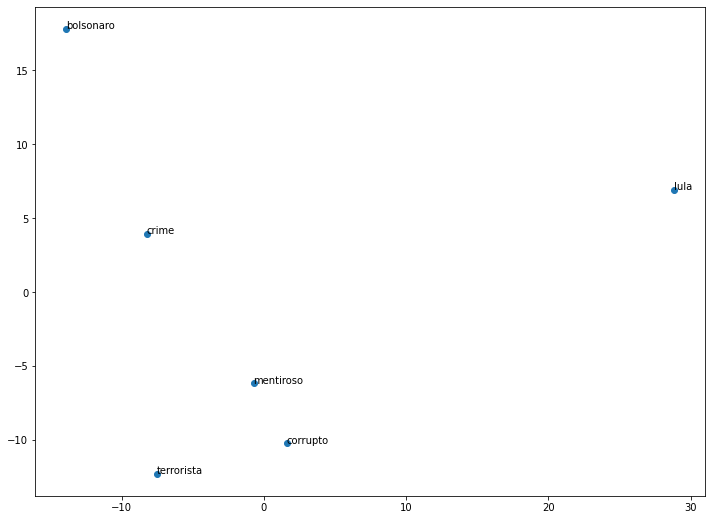

In [71]:
import matplotlib.pyplot as plt

eixo_x = []
eixo_y = []

for i in palavra_pca:
    eixo_x.append(i[0])
    eixo_y.append(i[1])
    
plt.figure(figsize=(20, 40))
fig, ax = plt.subplots(figsize=(12, 9))
ax.scatter(eixo_x, eixo_y)
for i, txt in enumerate(palavras0):
    ax.annotate(txt, (eixo_x[i], eixo_y[i]))

In [46]:
df.user.value_counts()

https://twitter.com/ErikakHilton       3115
https://twitter.com/ruthapda             90
https://twitter.com/gabLindenbach        89
https://twitter.com/pemveiga             60
https://twitter.com/fabiana01388191      42
                                       ... 
https://twitter.com/luizpsc               1
https://twitter.com/ELIFABRIN             1
https://twitter.com/yunnakii              1
https://twitter.com/EsterMa11933722       1
https://twitter.com/Thelma58517269        1
Name: user, Length: 12754, dtype: int64

In [109]:
vec = w2v_model.wv.get_vector('milícia') + w2v_model.wv.get_vector('bolsonaro')

In [110]:
w2v_model.wv.most_similar(vec)

[('golpe', 0.9864677786827087),
 ('peguem', 0.9854087829589844),
 ('mg', 0.9789071679115295),
 ('jefferson', 0.9664362072944641),
 ('confisca', 0.965559184551239),
 ('pobre', 0.9651178121566772),
 ('protege', 0.9645964503288269),
 ('favorecer', 0.9608728885650635),
 ('novamente', 0.9582116603851318),
 ('bolsonaro', 0.9558053016662598)]

In [126]:
import pandas as pd
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

# Load data
# df = pd.read_csv('tweets.csv')

# Tokenize and preprocess text data
stopwords = nltk.corpus.stopwords.words('portuguese')
stopwords.remove('não')
tfidf = TfidfVectorizer(stop_words=stopwords)
X = tfidf.fit_transform(df['rawContent'])

# Train KMeans clustering algorithm to group similar tweets
k = 2  # number of clusters
kmeans = KMeans(n_clusters=k)
labels = kmeans.fit_predict(X)

# Label tweets based on cluster assignment
df['sentiment_cluster'] = ['positive' if label == 0 else 'negative' for label in labels]

In [127]:
import pandas as pd
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Load data
# df = pd.read_csv('tweets.csv')

# Tokenize and preprocess text data
stopwords = nltk.corpus.stopwords.words('portuguese')
stopwords.remove('não')
cv = CountVectorizer(stop_words=stopwords)
X = cv.fit_transform(df['rawContent'])

# Train LDA topic model to identify topics/themes in tweets
n_topics = 2  # number of topics
lda = LatentDirichletAllocation(n_components=n_topics)
lda.fit(X)

# Manually assign sentiment labels to each topic
topic_sentiments = ['positive', 'negative']
topic_labels = [topic_sentiments[i] for i in lda.transform(X).argmax(axis=1)]

# Label tweets based on topic assignment
df['sentiment_topicmodel'] = topic_labels

In [128]:
df[['rawContent', 'sentiment_cluster', 'sentiment_topicmodel']]

,rawContent,sentiment_cluster,sentiment_topicmodel
0,"Ao longo do dia estou recebendo denúncias, inc...",positive,positive
1,@ErikakHilton Simplesmente a maior ❤️❤️❤️ http...,negative,positive
2,@PalasAthenas18 Hahahhaha 💜💜💜,positive,positive
3,"Ao longo do dia estou recebendo denúncias, inc...",positive,positive
4,@ErikakHilton É isso aí...,positive,negative
...,...,...,...
22500,@ErikakHilton @neon_cunha @marciofrancasp @Had...,positive,positive
22501,@ErikakHilton @neon_cunha @marciofrancasp @Had...,positive,negative
22502,"Meus candidatos pra estadual e federal, respec...",positive,negative
22503,@fabio_s_jr @esuplicy Muito obrigada pela forç...,positive,negative


In [129]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

nltk.download('vader_lexicon') # download the sentiment lexicon

sia = SentimentIntensityAnalyzer() # create the sentiment analyzer

# loop through the tweets and print their sentiment scores
for tweet in df['rawContent']:
    sentiment = sia.polarity_scores(tweet)
    print(tweet)
    print(sentiment)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\55199\AppData\Roaming\nltk_data...


Ao longo do dia estou recebendo denúncias, inclusive de pessoas presas há mais de 16h na estrada, sem água e sem comida, pelos bloqueios ilegais dos caminhoneiros.

Por isso, enviei requerimento para que a PRF nos dê informações sobre as dimensões dos atos e providencias tomadas. https://t.co/g0zRPmBLLX
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
@ErikakHilton Simplesmente a maior ❤️❤️❤️ https://t.co/SBA5EPiN7k
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
@PalasAthenas18 Hahahhaha 💜💜💜
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Ao longo do dia estou recebendo denúncias, inclusive de pessoas presas há mais de 16h na estrada, sem água e sem comida, pelos bloqueios ilegais dos caminhoneiros.

Por isso, enviei requerimento para que a PRF nos dê informações sobre as dimensões dos atos e providencias tomadas. https://t.co/g0zRPmBLLX
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
@ErikakHilton É isso aí...
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.